<a href="https://colab.research.google.com/github/ofekPeles/CourseINT/blob/main/Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import librarys**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

#**Conect to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Model**

In [ ]:
My_First_model = Sequential([
    ])

# **Conv2D**

In [ ]:
# sintax Conv2D
Conv2D(filters=8)

Conv2D(kernel_size = (3,3))

Conv2D(filters=8,kernel_size=(3,3))

# **Conv2D in Model**

In [ ]:
My_First_model = Sequential([
    Conv2D(filters=8,kernel_size=(3,3),input_shape=(224,224,3))
    ])

# **Conv2D Work**

In [ ]:
My_First_model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3))
    ])

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
# block to convert image to model
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array
img_path = '/content/GettyImages-1043597638-49acd69677d7442588c1d8930d298a59.jpg' # put the path to image or import the image from computer
img_array = load_and_preprocess_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Intermediate output for image 1:


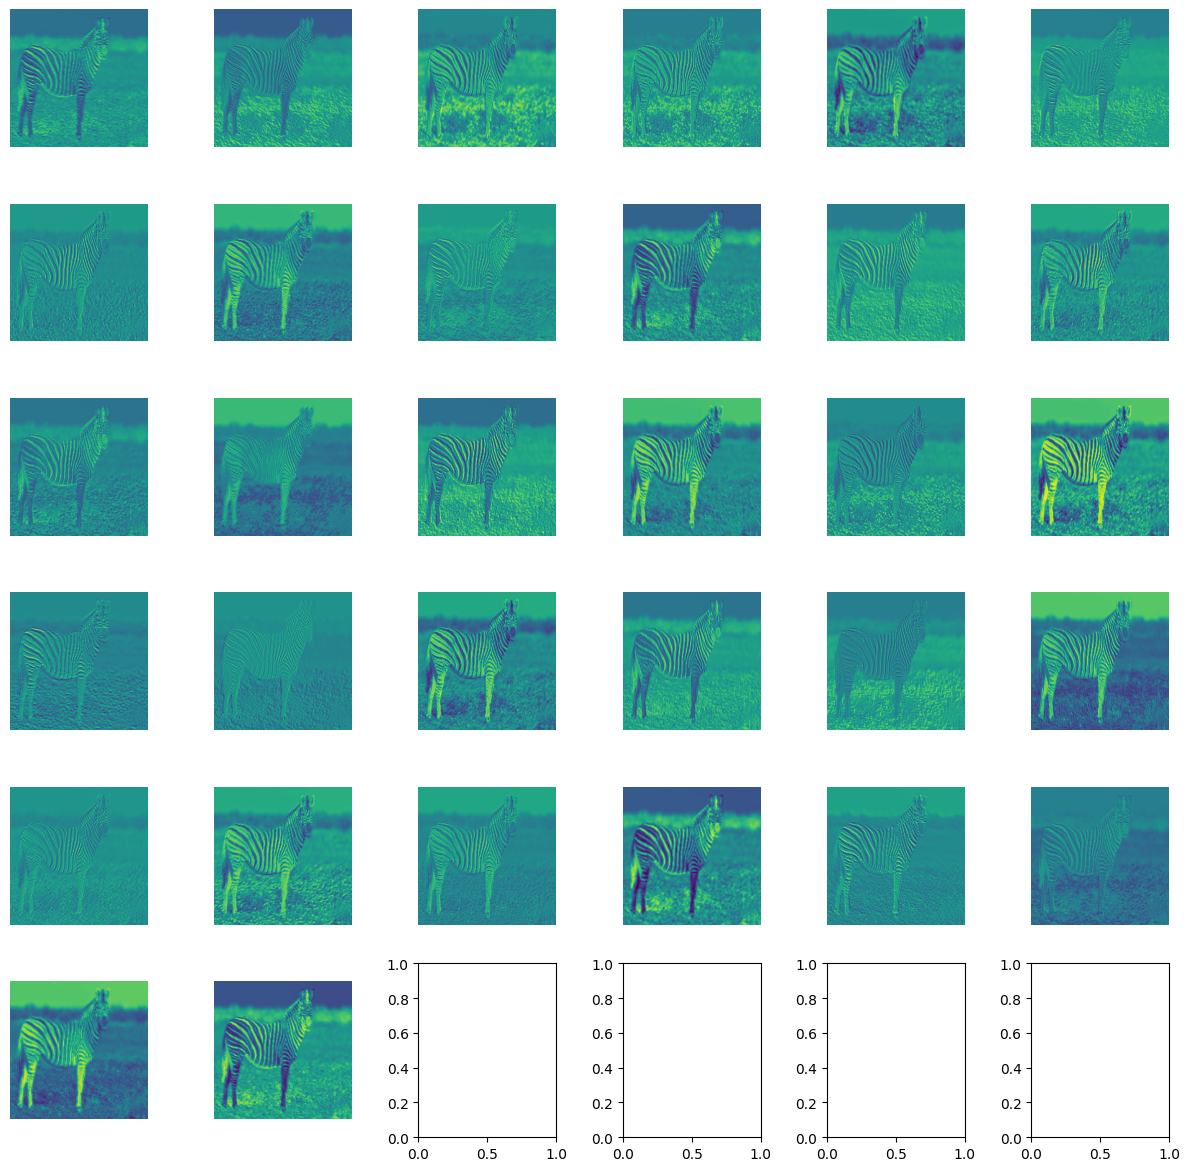

In [ ]:
# Check convolotion block
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
partial_model = Model(inputs= My_First_model.inputs, outputs=My_First_model.layers[0].output)

def plot_intermediate_output(intermediate_output):
    # קבלת מספר הפילטרים
    num_filters = intermediate_output.shape[-1]
    size = intermediate_output.shape[1]

    # הגדרת גודל הגריד (ריבוע)
    grid_size = int(np.ceil(np.sqrt(num_filters)))

    # יצירת תת-עלילות (subplots)
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
    axes = axes.flatten()

    for i in range(num_filters):
        if i < len(axes):
            ax = axes[i]
            ax.imshow(intermediate_output[0, :, :, i], cmap='viridis')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# הפעלת המודל החלקי על כל התמונות
intermediate_outputs = partial_model.predict(img_array)

# הצגת המידע בריבוע מסודר עבור כל תמונה
for i, intermediate_output in enumerate(intermediate_outputs):
    print(f'Intermediate output for image {i+1}:')
    plot_intermediate_output(intermediate_output[np.newaxis, ...])

# **Add layers Conv2D**

In [ ]:
My_First_model = Sequential([
    Conv2D(filters=8,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'),
    Conv2D(filters=16,kernel_size=(3,3),activation='relu')
    ])